# MIMIC-III (<span style="color:red">ATTENTION : les données dans mimic-iii correspondent à la base de données demo, seulement 100 patients répertoriés. La base entière fait 43 Go</span>)

### Infos sur la dataset : https://physionet.org/content/mimiciii/1.4/, https://mimic.mit.edu/

26 tables... quelles sont celles qui nous intéresse ? description des tables : https://mimic.mit.edu/docs/iii/tables/

### les 2 plus importantes :
- PRESCRIPTIONS.csv : médicaments donnés à chaque patient (date de début+fin d'administration)
- DIAGNOSES_ICD.csv : maladies diagnostiquées (ICD-9 et patient id)

### à savoir : 

- PATIENTS.csv : répertorie les patients, leur genre, date d'admission+sortie
- D_ICD_DIAGNOSES.csv et D_ICD_PROCEDURES.csv : associe le code ICD9 de chaque maladie à son nom (ex:01730 <-> tuberculosis of the eye)
- DRGCODES.csv : symptomes de chaque patient (je crois)
- MICROBIOLOGYEVENTS.csv : analyses biologiques des patients 


In [22]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

## Exploration de la table DIAGNOSES_ICD

In [23]:
df = pd.read_csv("mimic-iii-complet/DIAGNOSES_ICD.csv")

In [24]:
df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,1297,109,172335,1.0,40301
1,1298,109,172335,2.0,486
2,1299,109,172335,3.0,58281
3,1300,109,172335,4.0,5855
4,1301,109,172335,5.0,4254


In [25]:
df.shape

(651047, 5)

#### cb de maladies différentes ? 6984 maladies pour 46520 patients

In [27]:
df['ICD9_CODE'].nunique()

6984

In [28]:
df['SUBJECT_ID'].nunique()

46520

#### repartition de ces maladies ?

In [74]:
dp = df['ICD9_CODE'].value_counts()
dp.head(30)

4019     20703
4280     13111
42731    12891
41401    12429
5849      9119
25000     9058
2724      8690
51881     7497
5990      6555
53081     6326
2720      5930
V053      5779
V290      5519
2859      5406
2449      4917
486       4839
2851      4552
2762      4528
496       4431
99592     3912
V5861     3806
0389      3725
5070      3680
V3000     3566
5859      3435
311       3431
40390     3421
3051      3358
412       3278
2875      3065
Name: ICD9_CODE, dtype: int64

In [30]:
(dp==1).value_counts()

False    5481
True     1503
Name: ICD9_CODE, dtype: int64

#### -> bcp de ces maladies (1500) n'apparaissent qu'une fois dans la base

In [31]:
(dp<5).value_counts()

False    3874
True     3110
Name: ICD9_CODE, dtype: int64

#### -> la moitié de ces maladies (3100) apparaissent moins de 5 fois dans la base

In [77]:
(dp<100).value_counts()

True     6103
False     881
Name: ICD9_CODE, dtype: int64

#### -> 86% des maladies apparaissent moins de 100 fois dans la base

In [ ]:
dp.loc[df['A'] > 0,['A','B']].sum(axis=1)

In [113]:
r = dp.to_frame()

In [114]:
r

,ICD9_CODE
4019,20703
4280,13111
42731,12891
41401,12429
5849,9119
...,...
1270,1
E9659,1
71926,1
9593,1


## Exploration de la table D_ICD_DIAGNOSES

In [40]:
icd_diagnoses = pd.read_csv("mimic-iii/D_ICD_DIAGNOSES.csv")

In [41]:
icd_diagnoses.head()

,row_id,icd9_code,short_title,long_title
0,1,01716,Erythem nod tb-oth test,Erythema nodosum with hypersensitivity reactio...
1,2,01720,TB periph lymph-unspec,"Tuberculosis of peripheral lymph nodes, unspec..."
2,3,01721,TB periph lymph-no exam,"Tuberculosis of peripheral lymph nodes, bacter..."
3,4,01722,TB periph lymph-exam unk,"Tuberculosis of peripheral lymph nodes, bacter..."
4,5,01723,TB periph lymph-micro dx,"Tuberculosis of peripheral lymph nodes, tuberc..."


In [61]:
icd_diagnoses[icd_diagnoses["icd9_code"] == "4019"]

,row_id,icd9_code,short_title,long_title
4303,4304,4019,Hypertension NOS,Unspecified essential hypertension


In [62]:
icd_diagnoses[icd_diagnoses["icd9_code"] == "4280"]

,row_id,icd9_code,short_title,long_title
4472,4473,4280,CHF NOS,"Congestive heart failure, unspecified"


In [63]:
icd_diagnoses[icd_diagnoses["icd9_code"] == "42731"]

,row_id,icd9_code,short_title,long_title
4461,4462,42731,Atrial fibrillation,Atrial fibrillation


In [64]:
icd_diagnoses[icd_diagnoses["icd9_code"] == "41401"]

,row_id,icd9_code,short_title,long_title
4373,4374,41401,Crnry athrscl natve vssl,Coronary atherosclerosis of native coronary ar...


## Exploration de la table PATIENTS

In [32]:
patients = pd.read_csv("mimic-iii-complet/PATIENTS.csv")

In [35]:
patients.head()

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1
2,236,251,M,2090-03-15 00:00:00,NaN,NaN,NaN,0
3,237,252,M,2078-03-06 00:00:00,NaN,NaN,NaN,0
4,238,253,F,2089-11-26 00:00:00,NaN,NaN,NaN,0


In [36]:
patients["SUBJECT_ID"].nunique()

46520

#### -> chaque patient a bien une maladie

## Exploration de la table PRESCRIPTIONS

In [117]:
prescriptions = pd.read_csv("mimic-iii/PRESCRIPTIONS.csv") #demo

In [122]:
prescriptions["formulary_drug_cd"].nunique()

823

In [134]:
prescriptions["formulary_drug_cd"].value_counts().head(30)

FURO40I      244
NS500        229
NS1000       227
NACLFLUSH    206
INSULIN      201
D5W250       185
VANC1F       169
VANCOBASE    169
HEPA5I       151
KCL20PM      144
KCLBASE2     144
KCL20P       133
MAG2PM       132
NS250        114
ACET325      112
LR1000       108
D5W1000      105
METO25       103
CALG1I       101
MORP2I        98
NS100         95
D5W100        95
POTA20        94
SW50          92
SENN187       90
ALBU3H        88
METO5I        80
DOCU100       79
NABC50I       79
PANT40I       77
Name: formulary_drug_cd, dtype: int64

<AxesSubplot:>

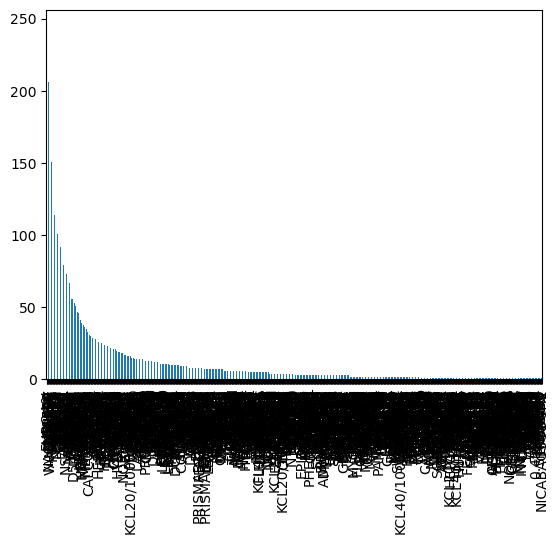

In [133]:
prescriptions["formulary_drug_cd"].value_counts().plot(kind="bar")

In [127]:
(prescriptions["formulary_drug_cd"].value_counts()==1).value_counts()

False    619
True     204
Name: formulary_drug_cd, dtype: int64

# ML

https://github.com/MLforHealth/MIMIC_Extract/tree/master/notebooks : Baselines for Mortality and LOS prediction (sklearn)